In [8]:
import pandas as pd  # Librerias para Dataset
import numpy as np # Lbreria Numerical para computacion cientifica, analisis de datos

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [11]:
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
# Load in the data
data = pd.read_csv(url, header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


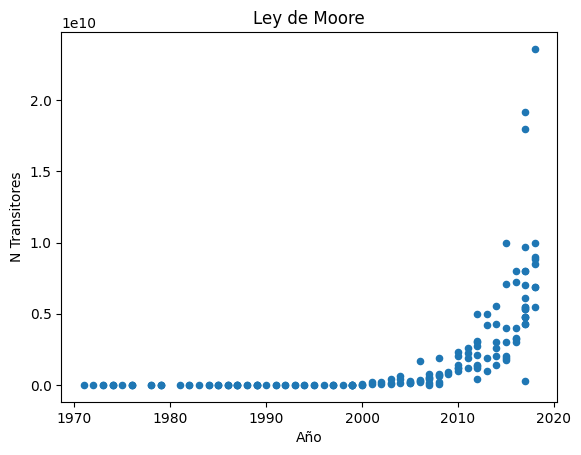

In [12]:
# Exploración gráfica simple:
ax = data.plot(
kind='scatter',
x=0, y=1,
title='Ley de Moore')
ax.set_xlabel('Año')
ax.set_ylabel('N Transitores');

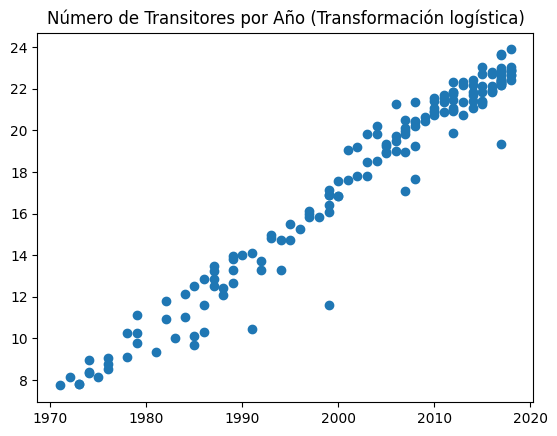

In [13]:
# Tratamos los datos como matrices:
X = data.loc[:,0] # todas las filas de la columna 0 (Año)
Y = data.loc[:,1] # todas las filas de la columna 1 (memoria)
# Queremos realizar una regresión lineal, por lo que la relación debe ser lineal. Para ello, sacamos el logaritmo de Y:
Y = np.log(Y)
plt.scatter(X, Y)
plt.title("Número de Transitores por Año (Transformación logística)")
plt.show()

In [14]:
X = X - X.mean()
X = X.values.reshape(-1, 1) 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
# Sacamos la pendiente (slope):
a = lm.coef_[0]
# print intercept and coefficients
print(f'Intercept : {lm.intercept_}')
print(f'Pendiente (coef) {a}')

Intercept : 17.764939393631764
Pendiente (coef) 0.3416824873873135


In [15]:
print("Tiempo en duplicar capacidad:", round(np.log(2) / a, 2))
# Tiempo en duplicar capacidad: 2.03

Tiempo en duplicar capacidad: 2.03


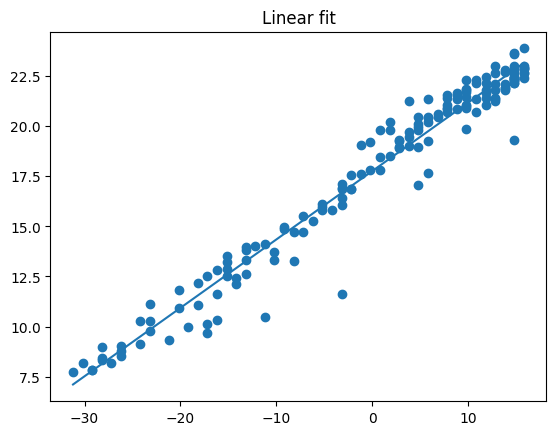

In [16]:
# Make sure the line fits our data
Yhat = lm.predict(X).flatten()
fig = plt.figure()
plt.title('Linear fit')
plt.scatter(X, Y)
plt.plot(X, Yhat);